# Explore here

In [139]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

In [140]:
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))


Files in 'c:\\Users\\34616\\Documents\\4GEEKS\\clases\\clase20_decisiontrees\\decision-trees\\src': ['app.py', 'explore.ipynb', 'utils.py']


In [141]:
# Your code here
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
urldata = pd.read_csv(url)
urldata.to_csv(r'C:\Users\34616\Documents\4GEEKS\clases\clase20_decisiontrees\decision-trees\data\raw\total_data.csv')
rawdata = pd.read_csv(r'C:\Users\34616\Documents\4GEEKS\clases\clase20_decisiontrees\decision-trees\data\raw\total_data.csv', index_col=False)
rawdata.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [142]:
rawdata = rawdata.drop('Unnamed: 0', axis=1)
rawdata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<Axes: >

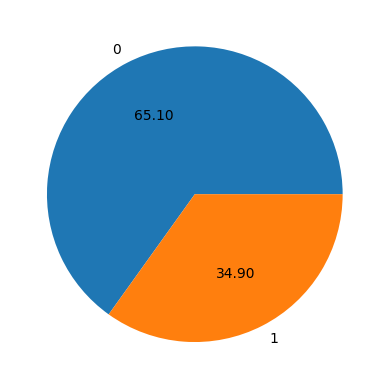

In [143]:
rawdata.groupby('Outcome').size().plot(kind='pie', autopct='%.2f')
# we can already observe how our data is unbalanced

In [144]:
print(rawdata.shape)
print(rawdata.info())
print("")
print(f"Dupes: {rawdata.duplicated().sum()}")
print(f"NaNs: ")
print(rawdata.isna().sum())
print("")
print(f"Nulls: ")
print(rawdata.isnull().sum())


(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Dupes: 0
NaNs: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0

## Finding and removing outliers

In [145]:
rawdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Pregnancies

(14, 9)


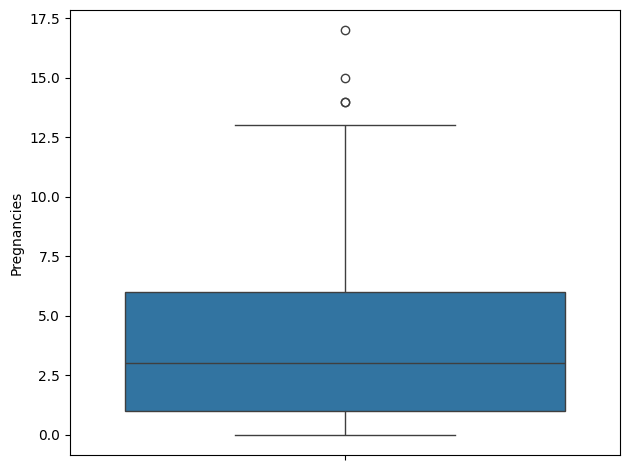

In [146]:
# finding aoutliers
print(rawdata[rawdata['Pregnancies'] >= 13].shape)

sns.boxplot(rawdata['Pregnancies'])
plt.tight_layout()
plt.show()

In [147]:
rawdata = rawdata[rawdata['Pregnancies'] <= 13]
rawdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,3.786649,120.776178,69.098168,20.476440,79.683246,31.966099,0.472260,33.187173,0.345550
std,3.278714,31.946234,19.401789,15.966814,115.436078,7.894034,0.331619,11.764745,0.475859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,27.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.626250,40.250000,1.000000
max,13.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Glucose

349     0
182     0
342     0
75      0
502     0
62     44
680    56
146    57
537    57
352    61
Name: Glucose, dtype: int64
(5, 9)


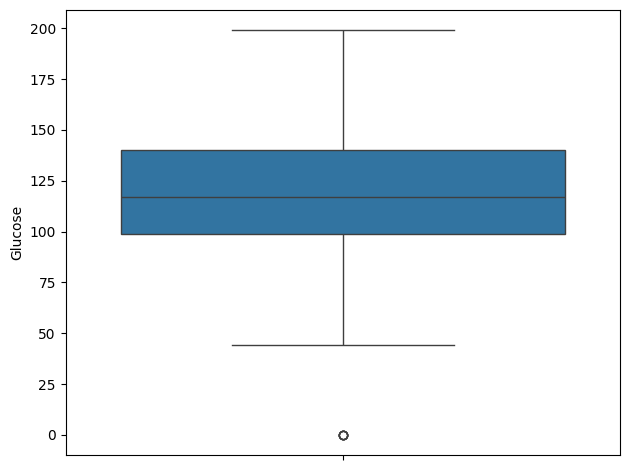

In [148]:
print(rawdata['Glucose'].sort_values(ascending=True).head(10))
print(rawdata[rawdata['Glucose'] == 0].shape)

sns.boxplot(rawdata['Glucose'])
plt.tight_layout()
plt.show()

In [149]:
rawdata = rawdata[rawdata['Glucose'] > 0]
rawdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,3.793149,121.571805,69.108037,20.416337,80.177866,31.960079,0.472867,33.217391,0.345191
std,3.283549,30.503121,19.445653,15.987728,115.652052,7.903176,0.332258,11.776902,0.475744
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,128.500000,36.500000,0.626500,40.500000,1.000000
max,13.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Blood Pressure

(35, 9)


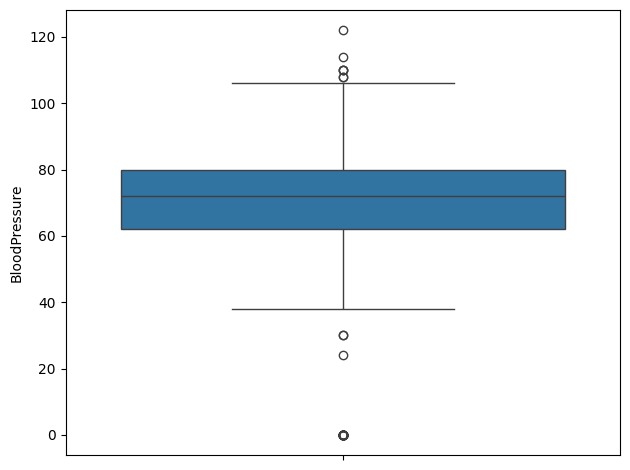

In [150]:
print(rawdata[rawdata['BloodPressure'] == 0].shape)
sns.boxplot(rawdata['BloodPressure'])
plt.tight_layout()
plt.show()

In [151]:
rawdata = rawdata[rawdata['BloodPressure'] > 0]
rawdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.801105,121.754144,72.448895,21.330110,84.053867,32.262431,0.476949,33.338398,0.339779
std,3.267544,30.646791,12.412187,15.747493,117.032682,7.286563,0.335168,11.855638,0.473962
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,47.000000,32.150000,0.380000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,130.000000,36.525000,0.629500,41.000000,1.000000
max,13.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Skin Thickness

Top outliers: 1
Zeros: 194


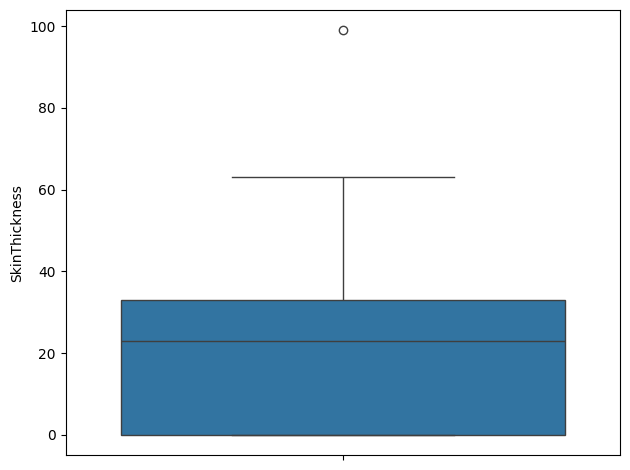

In [152]:
print(f"Top outliers: {len(rawdata[rawdata['SkinThickness'] > 80])}")
print(f"Zeros: {len(rawdata[rawdata['SkinThickness'] == 0])}")


sns.boxplot(rawdata['SkinThickness'])
plt.tight_layout()
plt.show()

##### First we remove the top outlier

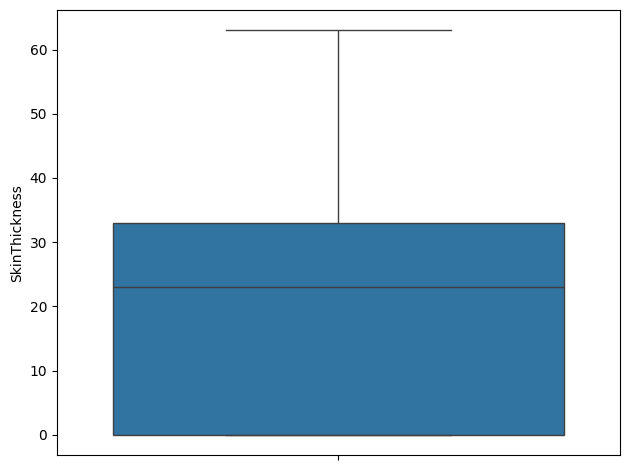

In [153]:
rawdata = rawdata[rawdata['SkinThickness'] <= 80]
sns.boxplot(rawdata['SkinThickness'])
plt.tight_layout()
plt.show()

### Skin thickness can't be zero. We need to deal with the 194 zeros

In [154]:
zeros = len(rawdata[rawdata['SkinThickness'] == 0])
total = len(rawdata)

print(f"Zeros % = {round((zeros/total)*100, 3)}")

# since it is a high percentage of zeros, we are first going to try a model without that column

df_noskin = rawdata.drop('SkinThickness', axis=1)

df_noskin



Zeros % = 26.833


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


### Now we continue to find other outliers to perfect the data


### Insulin

In [155]:
rawdata['Insulin'].describe()

count    723.000000
mean      84.170124
std      117.071858
min        0.000000
25%        0.000000
50%       48.000000
75%      130.000000
max      846.000000
Name: Insulin, dtype: float64

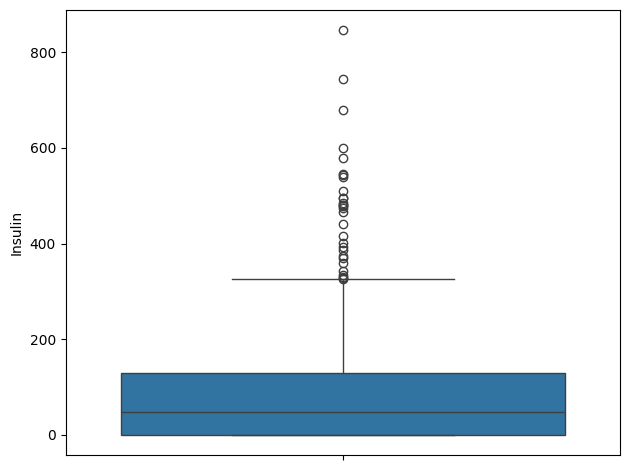

 N. of outliers: 9
TopOutliers perc: 0.012448132780082987


In [156]:
sns.boxplot(df_noskin['Insulin'])
plt.tight_layout()
plt.show()
x = 500
outliers = len(df_noskin[df_noskin['Insulin'] > x])
print(f" N. of outliers: {outliers}")
print(f"TopOutliers perc: {outliers / len(df_noskin)}")
### this variable is highly dispersed, and I belive removing outliers is not helpful (there will always be)
### and the data set is too small to remove them, so we will keep them

### BMI

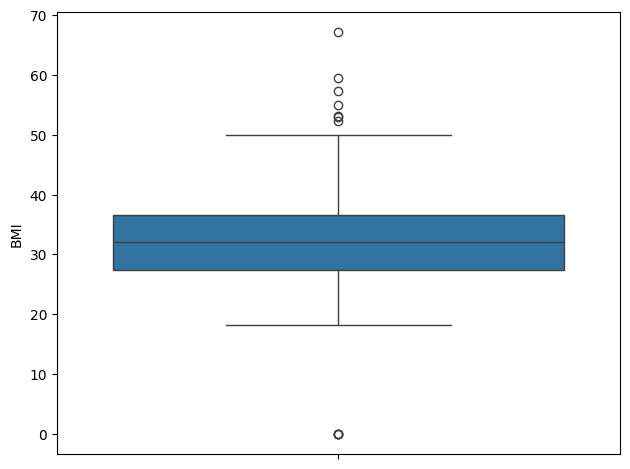

 N. of zeros: 4
Zeros %: 0.005532503457814661


In [157]:
sns.boxplot(df_noskin['BMI'])
plt.tight_layout()
plt.show()
x = 500
outliers = len(df_noskin[df_noskin['BMI'] == 0])
print(f" N. of zeros: {outliers}")
print(f"Zeros %: {outliers / len(df_noskin)}")

In [158]:
## Since this is a very small number of zeros (BMI cannot be zero) I will replace them with the column mean

df_noskin['BMI'] = df_noskin['BMI'].replace(0,df_noskin['BMI'].mean())


In [159]:
df_noskin.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,3.803596,121.650069,72.452282,84.170124,32.437533,0.476813,33.298755,0.338866
std,3.269118,30.539708,12.420445,117.071858,6.882008,0.335380,11.815729,0.473652
min,0.000000,44.000000,24.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,48.000000,32.259059,0.380000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,130.000000,36.550000,0.630000,41.000000,1.000000
max,13.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Diabetes Pedigree Function

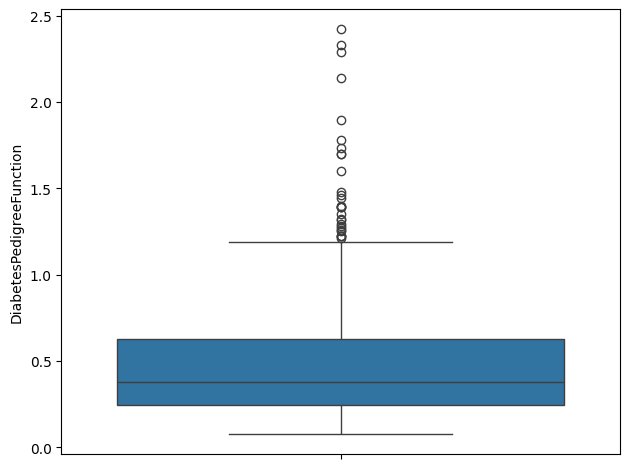

 N. of outliers: 10
Outlier %: 0.013831258644536652


In [160]:
sns.boxplot(df_noskin['DiabetesPedigreeFunction'])
plt.tight_layout()
plt.show()
x = 1.5
outliers = len(df_noskin[df_noskin['DiabetesPedigreeFunction'] > x])
print(f" N. of outliers: {outliers}")
print(f"Outlier %: {outliers / len(df_noskin)}")




### Very small amount of outliers, we can delete / substitute


In [161]:
locs = df_noskin.loc[df_noskin['DiabetesPedigreeFunction'] > 1.5, 'Outcome']
print(locs)

# as we can see, pedigree function is not very accurate in high values
# however, we are still going to keep those outliers for good

df_noskin = df_noskin[df_noskin['DiabetesPedigreeFunction'] <= 1.5]

print(df_noskin.describe())

4      1
45     1
58     0
228    0
370    1
371    0
395    0
445    1
593    0
621    0
Name: Outcome, dtype: int64
       Pregnancies     Glucose  BloodPressure     Insulin         BMI  \
count   713.000000  713.000000     713.000000  713.000000  713.000000   
mean      3.838710  121.347826      72.531557   82.727910   32.369673   
std       3.274101   30.327791      12.392886  113.938168    6.811615   
min       0.000000   44.000000      24.000000    0.000000   18.200000   
25%       1.000000   99.000000      64.000000    0.000000   27.400000   
50%       3.000000  117.000000      72.000000   46.000000   32.259059   
75%       6.000000  140.000000      80.000000  130.000000   36.500000   
max      13.000000  199.000000     122.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                713.000000  713.000000  713.000000  
mean                   0.456045   33.370266    0.338008  
std                    0.285742   11.860155    0.4

### Age

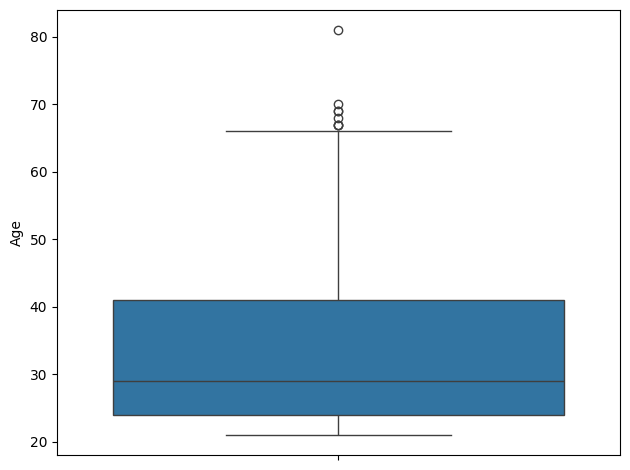

459    0
Name: Outcome, dtype: int64
       Pregnancies     Glucose  BloodPressure     Insulin         BMI  \
count   711.000000  711.000000     711.000000  711.000000  711.000000   
mean      3.831224  121.296765      72.516174   82.876231   32.378590   
std       3.272968   30.353745      12.405108  114.052997    6.816872   
min       0.000000   44.000000      24.000000    0.000000   18.200000   
25%       1.000000   99.000000      64.000000    0.000000   27.450000   
50%       3.000000  117.000000      72.000000   46.000000   32.259059   
75%       6.000000  140.000000      80.000000  130.000000   36.500000   
max      13.000000  199.000000     122.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                711.000000  711.000000  711.000000  
mean                   0.456350   33.251758    0.337553  
std                    0.286023   11.660209    0.473208  
min                    0.078000   21.000000    0.000000  
25%            

In [162]:
sns.boxplot(df_noskin['Age'])
plt.tight_layout()
plt.show()

viejo = df_noskin.loc[df_noskin['Age'] > 70, 'Outcome']
print(viejo)

df_noskin = df_noskin[df_noskin['Age'] < 70]

print(df_noskin.describe())

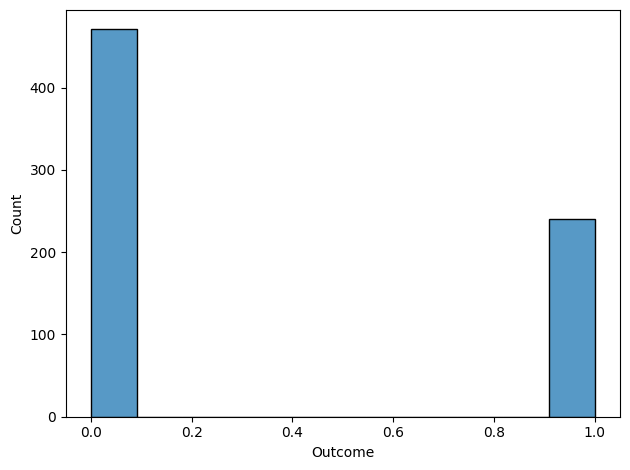

In [163]:
freq = df_noskin['Outcome']
sns.histplot(freq)
plt.tight_layout()
plt.show()

In [164]:
df_noskin.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,3.831224,121.296765,72.516174,82.876231,32.378590,0.456350,33.251758,0.337553
std,3.272968,30.353745,12.405108,114.052997,6.816872,0.286023,11.660209,0.473208
min,0.000000,44.000000,24.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,27.450000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,46.000000,32.259059,0.374000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,130.000000,36.500000,0.613500,41.000000,1.000000
max,13.000000,199.000000,122.000000,846.000000,67.100000,1.476000,69.000000,1.000000


## Modeling

### First Model (without the SkinThickness Variable)

In [188]:
df_noskin.to_csv(r'C:\Users\34616\Documents\4GEEKS\clases\clase20_decisiontrees\decision-trees\data\processed\skin\total_clean.csv', index=False)

X = df_noskin.drop("Outcome", axis=1)
y = df_noskin['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=21)

print(X_train.head())



     Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
580            0      151             90        0  42.1   
157            1      109             56      135  25.2   
90             1       80             55        0  19.1   
687            1      107             50        0  28.3   
501            3       84             72        0  37.2   

     DiabetesPedigreeFunction  Age  SkinThickness  
580                     0.371   21      46.000000  
157                     0.833   23      21.000000  
90                      0.258   21      21.068917  
687                     0.181   29      19.000000  
501                     0.267   28      32.000000  


In [166]:
clean_train_no_skin = pd.concat([X_train, y_train])
clean_test_no_skin = pd.concat([X_test, y_test])

clean_train_no_skin.to_csv(r"C:\Users\34616\Documents\4GEEKS\clases\clase20_decisiontrees\decision-trees\data\processed\no_skin\clean_train_no_skin.csv")
clean_test_no_skin.to_csv(r"C:\Users\34616\Documents\4GEEKS\clases\clase20_decisiontrees\decision-trees\data\processed\no_skin\clean_test_no_skin.csv")

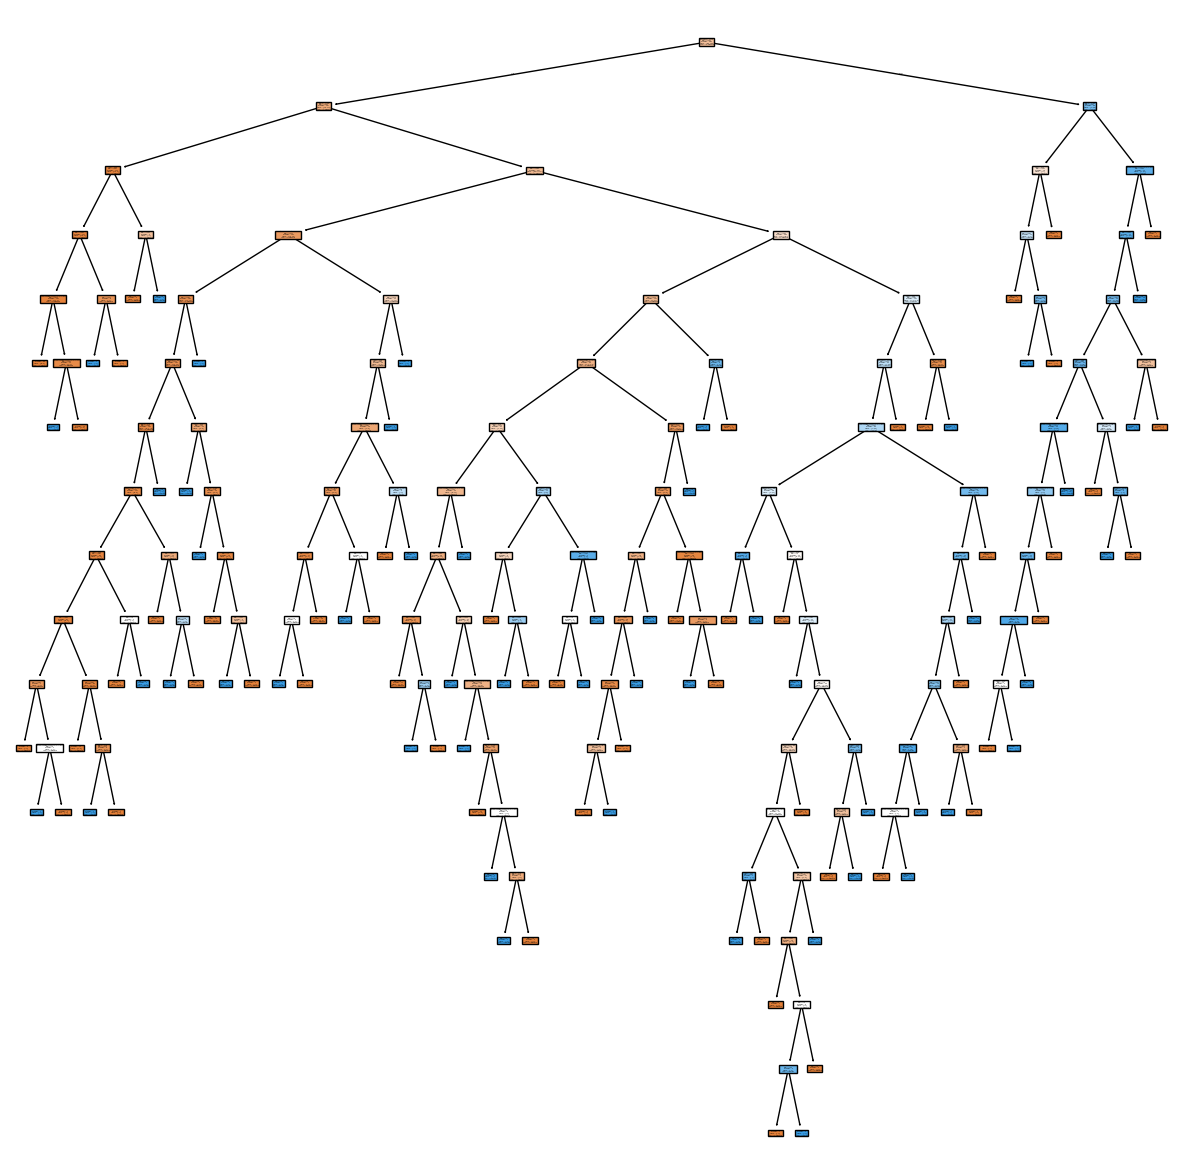

In [167]:
model_c1 = DecisionTreeClassifier(random_state=21)
model_c1.fit(X_train, y_train)

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_c1, feature_names = list(X_train.columns), class_names = ["No diabetes", "Diabetes"], filled = True)

plt.show()

In [168]:
# classifier prediction
y_pred_test = model_c1.predict(X_test)
y_pred_test[::10]

y_pred_train = model_c1.predict(X_train)
y_pred_train[::10]

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

### Evaluation of Model 1 (no skin thickness variable)

In [169]:
# model 1 evaluation
print("Model 1 evaluation: ")
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)


Model 1 evaluation: 
Accuracy Test:  0.7202797202797203
F1 score Test:  0.7202797202797203
Precision Test:  0.7202797202797203
Recall Test:  0.7202797202797203
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0


In [170]:
print(classification_report(y_test, y_pred_test, target_names=["No diabetes", "Diabetes"]))

              precision    recall  f1-score   support

 No diabetes       0.79      0.75      0.77        88
    Diabetes       0.63      0.67      0.65        55

    accuracy                           0.72       143
   macro avg       0.71      0.71      0.71       143
weighted avg       0.72      0.72      0.72       143



In [171]:
dump(model_c1, open('modelc1_noskin_dt.sav', 'wb'))

## Model 2 (WITH SKIN)

### gathering back the data

In [191]:
df_noskin['SkinThickness'] = rawdata['SkinThickness']

df = df_noskin

df.to_csv(r'C:\Users\34616\Documents\4GEEKS\clases\clase20_decisiontrees\decision-trees\data\processed\skin\total_clean.csv', index=False)

print(df.head())

zeros = df[df['SkinThickness'] == 0]
print(zeros.shape)

   Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0            6      148             72        0  33.6   
1            1       85             66        0  26.6   
2            8      183             64        0  23.3   
3            1       89             66       94  28.1   
5            5      116             74        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  SkinThickness  
0                     0.627   50        1             35  
1                     0.351   31        0             29  
2                     0.672   32        1              0  
3                     0.167   21        0             23  
5                     0.201   30        0              0  
(193, 9)


### Model 2 replacing SkinThickness = 0 with mean

In [173]:
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

print(df.describe())

       Pregnancies     Glucose  BloodPressure     Insulin         BMI  \
count   711.000000  711.000000     711.000000  711.000000  711.000000   
mean      3.831224  121.296765      72.516174   82.876231   32.378590   
std       3.272968   30.353745      12.405108  114.052997    6.816872   
min       0.000000   44.000000      24.000000    0.000000   18.200000   
25%       1.000000   99.000000      64.000000    0.000000   27.450000   
50%       3.000000  117.000000      72.000000   46.000000   32.259059   
75%       6.000000  140.000000      80.000000  130.000000   36.500000   
max      13.000000  199.000000     122.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  SkinThickness  
count                711.000000  711.000000  711.000000     711.000000  
mean                   0.456350   33.251758    0.337553      26.788046  
std                    0.286023   11.660209    0.473208       9.224078  
min                    0.078000   21.000000    0.0

In [174]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

X_train.head(10)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,SkinThickness
580,0,151,90,0,42.1,0.371,21,46.000000
157,1,109,56,135,25.2,0.833,23,21.000000
90,1,80,55,0,19.1,0.258,21,21.068917
687,1,107,50,0,28.3,0.181,29,19.000000
501,3,84,72,0,37.2,0.267,28,32.000000
386,5,116,74,0,32.3,0.660,35,29.000000
124,0,113,76,0,33.3,0.278,23,21.068917
64,7,114,66,0,32.8,0.258,42,21.068917
120,0,162,76,100,53.2,0.759,25,56.000000
672,10,68,106,49,35.5,0.285,47,23.000000


In [175]:
clean_train = pd.concat([X_train, y_train])
clean_test = pd.concat([X_test, y_test])
clean_train.to_csv(r"C:\Users\34616\Documents\4GEEKS\clases\clase20_decisiontrees\decision-trees\data\processed\skin\clean_train.csv")
clean_test.to_csv(r"C:\Users\34616\Documents\4GEEKS\clases\clase20_decisiontrees\decision-trees\data\processed\skin\clean_test.csv")

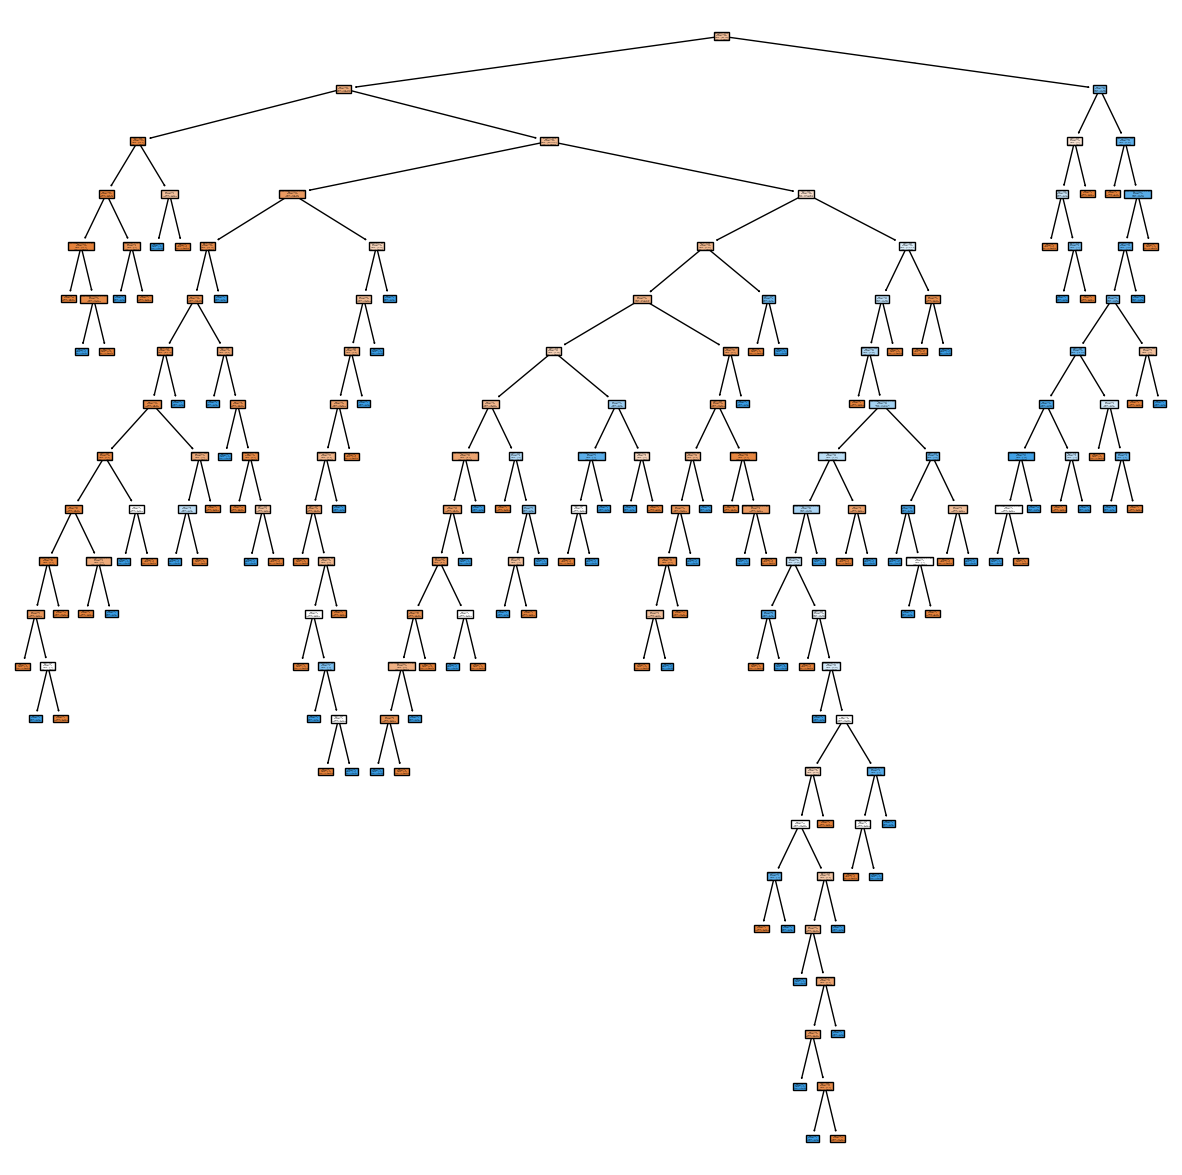

In [176]:
model_c2 = DecisionTreeClassifier(random_state=21)
model_c2.fit(X_train, y_train)

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_c2, feature_names = list(X_train.columns), class_names = ["No diabetes", "Diabetes"], filled = True)

plt.show()


In [181]:
# predicción
y_pred_test2 = model_c2.predict(X_test)
y_pred_test2

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [182]:
y_pred_train2 = model_c2.predict(X_train)
y_pred_train2

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [183]:
# model 2 evaluation
print("Model 2 evaluation: ")
accuracy_test = accuracy_score(y_test, y_pred_test2)
accuracy_train = accuracy_score(y_train, y_pred_train2)

f1_score_test = f1_score(y_test, y_pred_test2, average='micro')
f1_score_train = f1_score(y_train, y_pred_train2, average='micro')

precision_test = precision_score(y_test, y_pred_test2, average='micro')
precision_train = precision_score(y_train, y_pred_train2, average='micro')

recall_test = recall_score(y_test, y_pred_test2, average='micro')
recall_train = recall_score(y_train, y_pred_train2, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Model 2 evaluation: 
Accuracy Test:  0.7482517482517482
F1 score Test:  0.7482517482517482
Precision Test:  0.7482517482517482
Recall Test:  0.7482517482517482
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0


In [184]:
print("Model 2 classification report: ")
print(classification_report(y_test, y_pred_test2, target_names=["No diabetes", "Diabetes"]))

Model 2 classification report: 
              precision    recall  f1-score   support

 No diabetes       0.78      0.82      0.80        88
    Diabetes       0.69      0.64      0.66        55

    accuracy                           0.75       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



In [187]:
dump(model_c2, open('modelc2_skin_dt.sav', 'wb'))